## CytOpt on the HIPC Data

In this notebook, we apply our method ${\tt CytOpt}$ on various datasets of the HIPC panel. From our numerical experiments, the computation time to get an estimate of the class proportions with the descent-ascent procedure is between 10 and 20 minutes. With the minmax swapping procedure, this computation time is between 1 and 3 minutes.

##### How to try ${\tt CytOpt}$ on other HIPC data sets.

An HIPC data set has the following structure :

xx_y_values : Cytometry measurements 

xx_y_clust : Corresponding manual clustering

xx labels the center where the data analysis was performed.
-replace xx by W2 for Stanford .
-replace xx by D54 for NHLBI.
-replace xx by FTV for Yale.
-replace xx by IU for UCLA.
-replace xx by O0 for CIMR.
-replace xx by pw for Baylor.
-replace xx by pM for Miami.

y labels the patient and the replicate of the biological sample.
-replace y by 1 for patient 1 replicate A (except for Baylor this replicate is not available).
-replace y by 2 for patient 1 replicate B.
-replace y by 3 for patient 1 replicate C.
-replace y by 4 for patient 2 replicate A.
-replace y by 5 for patient 2 replicate B.
-replace y by 6 for patient 2 replicate C.
-replace y by 7 for patient 3 replicate A.
-replace y by 8 for patient 3 replicate B.
-replace y by 9 for patient 3 replicate C.


##### import modules and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from CytOpT import CytOpt
from CytOpT import CytOpt_plot
from CytOpT import Label_Prop_sto

##### import data

In [3]:
#Source Data

Stanford1A_values = pd.read_csv('../../data/W2_1_values.csv',
                                 usecols = np.arange(1,8))
Stanford1A_clust = pd.read_csv('../../data/W2_1_clust.csv',
                                usecols = [1])

#Target Data

Stanford3C_values = pd.read_csv('../../data/W2_9_values.csv',
                                 usecols = np.arange(1,8))
Stanford3C_clust = pd.read_csv('../../data/W2_9_clust.csv',
                                usecols = [1])


Miami3A_values = pd.read_csv('../../data/pM_7_values.csv', 
                             usecols = np.arange(1,8))
Miami3A_clust = pd.read_csv('../../data/pM_7_clust.csv',
                            usecols = [1])


Ucla2B_values = pd.read_csv('../../data/IU_5_values.csv',
                            usecols = np.arange(1,8))
Ucla2B_clust = pd.read_csv('../../data/IU_5_clust.csv',
                           usecols = [1])

Preprocessing of the source data

In [55]:
X_source = np.asarray(Stanford1A_values)
Lab_source = np.asarray(Stanford1A_clust['x'])

#### Target data : Stanford3C

Preprocessing of the target data

In [56]:
X_target = np.asarray(Stanford3C_values)
Lab_target = np.asarray(Stanford3C_clust['x'])

Computation of the benchmark class proportions

In [57]:
h_true = np.zeros(10)
for k in range(10):
    h_true[k] = np.sum(Lab_target == k+1)/len(Lab_target)
    
Lab_target

array([ 1,  1,  1, ..., 10, 10, 10])

##### Descent-ascent procedure

Setting of the parameters for the descent-ascent procedure.

In [58]:
n_it_grad = 5000
n_it_sto = 10
pas_grad = 10
eps=0.0005
monitoring=False

In [59]:
t0 = time.time()
h_hat1 = CytOpt.CytOpT(X_source, X_target, Lab_source,theta_true=h_true,
                      method="desasc",n_it_grad=n_it_grad,n_it_sto=n_it_sto,step_grad=pas_grad,eps=eps,
                      monitoring=monitoring)
elapsed_time = time.time() - t0


 Epsilon:  0.0005
Iteration  0
Current h_hat
[0.1005228  0.10106622 0.10153034 0.1026849  0.10082105 0.08871911
 0.10150454 0.10139207 0.1015821  0.10017687]
Iteration  100
Current h_hat
[0.10687956 0.11920205 0.10003603 0.1179809  0.06493221 0.02426624
 0.13867058 0.12521553 0.13377772 0.0690392 ]
Iteration  200
Current h_hat
[0.10456623 0.13315662 0.08316526 0.10955507 0.05602586 0.01820047
 0.17281199 0.1372194  0.13468276 0.05061634]
Iteration  300
Current h_hat
[0.09792383 0.12684238 0.08150942 0.09541654 0.04879955 0.01489475
 0.19892129 0.1474249  0.14100647 0.04726087]
Iteration  400
Current h_hat
[0.08991318 0.11985061 0.08045244 0.09126505 0.04447986 0.01153671
 0.22662566 0.15789648 0.13871514 0.03926488]
Iteration  500
Current h_hat
[0.08758197 0.11587442 0.07009756 0.08828753 0.0429004  0.01069455
 0.2418405  0.16148067 0.1474553  0.03378711]
Iteration  600
Current h_hat
[0.0842887  0.11079729 0.0668799  0.07651447 0.03650229 0.00939527
 0.28261782 0.17989862 0.12272679 0

In [60]:
print('Elapsed_time :', elapsed_time/60, 'mins')

Elapsed_time : 3.3967535853385926 mins


In [61]:
h_hat1 = h_hat1['proportions']
h_hat1

,Gold_standard,desasc
0,0.016490,0.044397
1,0.130506,0.119139
2,0.049117,0.041391
3,0.057538,0.070987
4,0.009776,0.014040
5,0.003239,0.004824
6,0.335159,0.346530
7,0.270289,0.221424
8,0.106596,0.119278
9,0.021290,0.017989


##### Minmax swapping procedure

parameters setting for the second procedure

In [62]:
lbd = 0.0001
eps_two = 0.0001
n_iter = 5000
step_size = 5
power = 0.99

In [63]:
t0 = time.time()
results = CytOpt.CytOpT(X_source, X_target, Lab_source, theta_true=h_true,
                             method="minmax",lbd=lbd,eps=eps_two,n_iter=n_iter,step=step_size,power=power)
elapsed_time = time.time() - t0

Done ( 10.64818549156189 s)



In [64]:
print('Elapsed time : ',elapsed_time/60, 'Mins')

Elapsed time :  0.17786118984222413 Mins


In [65]:
h_hat2 = results['proportions']
h_hat2

,Gold_standard,minmax
0,0.016490,0.035741
1,0.130506,0.111390
2,0.049117,0.051520
3,0.057538,0.057816
4,0.009776,0.015243
5,0.003239,0.006277
6,0.335159,0.330876
7,0.270289,0.236537
8,0.106596,0.150402
9,0.021290,0.004199


In [66]:
h_hat1['minmax'] = h_hat2['minmax']
h_hat1

,Gold_standard,desasc,minmax
0,0.016490,0.044397,0.035741
1,0.130506,0.119139,0.111390
2,0.049117,0.041391,0.051520
3,0.057538,0.070987,0.057816
4,0.009776,0.014040,0.015243
5,0.003239,0.004824,0.006277
6,0.335159,0.346530,0.330876
7,0.270289,0.221424,0.236537
8,0.106596,0.119278,0.150402
9,0.021290,0.017989,0.004199


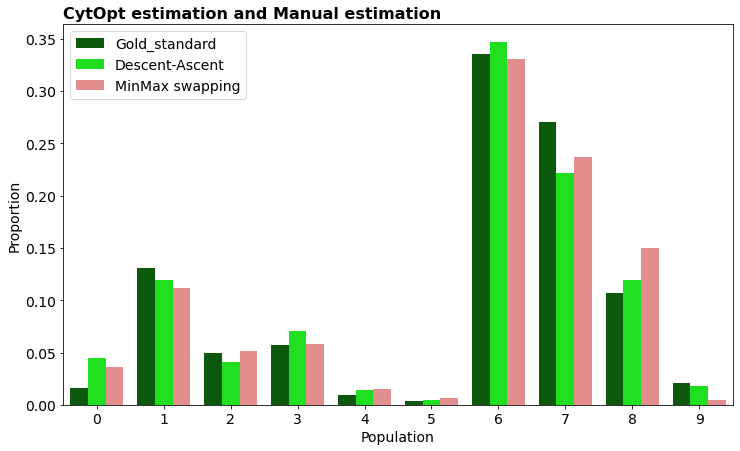

In [67]:
CytOpt_plot.bar_plot(h_hat1)

#### Target Data : Miami3A

In [68]:
X_target = np.asarray(Miami3A_values)
Lab_target = np.asarray(Miami3A_clust['x'])

Computation of the benchmark class proportions

In [69]:
h_true = np.zeros(10)
for k in range(10):
    h_true[k] = np.sum(Lab_target == k+1)/len(Lab_target)

##### Descent-ascent procedure

In [70]:
t0 = time.time()
h_hat1 = CytOpt.CytOpT(X_source, X_target, Lab_source, theta_true=h_true,
                      method="desasc",n_it_grad=n_it_grad,n_it_sto=n_it_sto,step_grad=pas_grad,eps=eps,
                      monitoring=False)
elapsed_time = time.time() - t0


 Epsilon:  0.0005
Iteration  0
Current h_hat
[0.10042905 0.10053208 0.10179042 0.10039229 0.09757567 0.09447887
 0.10160349 0.10137442 0.10130685 0.10051687]
Iteration  100
Current h_hat
[0.10438601 0.11319997 0.12623379 0.10135244 0.074247   0.02283775
 0.13145413 0.13003388 0.1049881  0.09126693]
Iteration  200
Current h_hat
[0.09910947 0.12594556 0.10947147 0.09559563 0.05897905 0.01489458
 0.161881   0.1720003  0.09708877 0.06503417]
Iteration  300
Current h_hat
[0.09243734 0.12860117 0.1156628  0.08373407 0.0493288  0.0118363
 0.18108651 0.19100895 0.0969851  0.04931897]
Iteration  400
Current h_hat
[0.08444466 0.12495876 0.10109209 0.08665691 0.04213568 0.0098964
 0.21272734 0.20447055 0.09118785 0.04242975]
Iteration  500
Current h_hat
[0.07661114 0.13030294 0.08605273 0.07726388 0.03935356 0.00835616
 0.23760487 0.21152591 0.09432429 0.03860452]
Iteration  600
Current h_hat
[0.07062525 0.11341782 0.08114119 0.07054038 0.03253804 0.00811691
 0.24226965 0.24737652 0.09733714 0.0

In [71]:
h_hat1 = h_hat1['proportions']
h_hat1

,Gold_standard,desasc
0,0.019224,0.030600
1,0.110346,0.088235
2,0.080459,0.096648
3,0.059372,0.038235
4,0.005213,0.013390
5,0.002689,0.002648
6,0.276879,0.259453
7,0.354390,0.339847
8,0.083880,0.108687
9,0.007548,0.022258


In [72]:
print('Elapsed_time :', elapsed_time/60, 'mins')

Elapsed_time : 4.18566692272822 mins


##### Minmax swapping procedure

In [73]:
t0 = time.time()
results = CytOpt.CytOpT(X_source, X_target, Lab_source, theta_true=h_true,
                             method="minmax",lbd=lbd,eps=eps_two,n_iter=n_iter,step=step_size,power=power)
elapsed_time = time.time() - t0

Done ( 18.672608375549316 s)



In [74]:
print('Elapsed time : ',elapsed_time/60, 'Mins')

Elapsed time :  0.31150219837824505 Mins


##### Results

In [75]:
h_hat2 = results['proportions']
h_hat2

,Gold_standard,minmax
0,0.019224,1.919805e-02
1,0.110346,9.996989e-02
2,0.080459,1.011499e-01
3,0.059372,3.688853e-02
4,0.005213,2.391635e-02
5,0.002689,6.624989e-22
6,0.276879,2.538652e-01
7,0.354390,3.413413e-01
8,0.083880,9.119575e-02
9,0.007548,3.247500e-02


In [76]:
h_hat1['minmax'] = h_hat2['minmax']
h_hat1

,Gold_standard,desasc,minmax
0,0.019224,0.030600,1.919805e-02
1,0.110346,0.088235,9.996989e-02
2,0.080459,0.096648,1.011499e-01
3,0.059372,0.038235,3.688853e-02
4,0.005213,0.013390,2.391635e-02
5,0.002689,0.002648,6.624989e-22
6,0.276879,0.259453,2.538652e-01
7,0.354390,0.339847,3.413413e-01
8,0.083880,0.108687,9.119575e-02
9,0.007548,0.022258,3.247500e-02


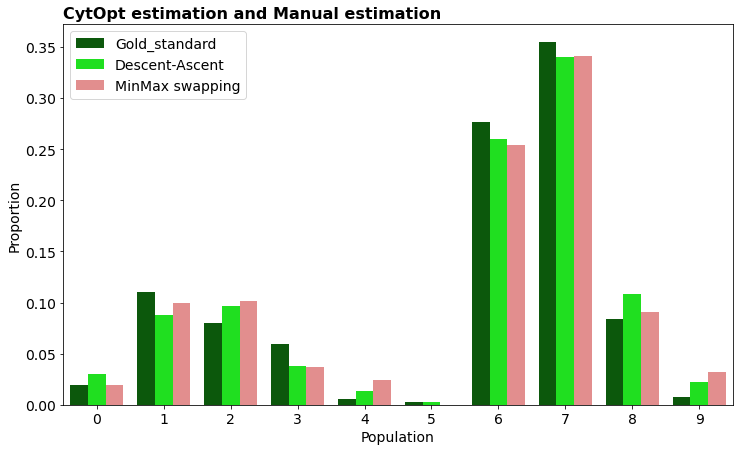

In [77]:
CytOpt_plot.bar_plot(h_hat1)

##### Target data : UCLA2B

In [78]:
X_target = np.asarray(Ucla2B_values)
Lab_target = np.asarray(Ucla2B_clust['x'])

Computation of the benchmark class proportions

In [79]:
h_true = np.zeros(10)
for k in range(10):
    h_true[k] = np.sum(Lab_target == k+1)/len(Lab_target)

##### Descent-ascent procedure

In [80]:
t0 = time.time()
h_hat1 = CytOpt.CytOpT(X_source, X_target, Lab_source,theta_true=h_true,
                      method="desasc",n_it_grad=n_it_grad,n_it_sto=n_it_sto,step_grad=pas_grad,eps=eps,
                      monitoring=monitoring)
elapsed_time = time.time() - t0


 Epsilon:  0.0005
Iteration  0
Current h_hat
[0.10083666 0.1005426  0.10021481 0.10077373 0.10276693 0.09205834
 0.10088096 0.10051413 0.10090294 0.10050891]
Iteration  100
Current h_hat
[0.11491704 0.12838036 0.10402665 0.10623983 0.06632491 0.021539
 0.12970396 0.13185756 0.13460324 0.06240746]
Iteration  200
Current h_hat
[0.11518507 0.14472351 0.08666736 0.10989105 0.05194602 0.01786127
 0.13585329 0.1480002  0.14510308 0.04476915]
Iteration  300
Current h_hat
[0.11387943 0.16181331 0.07611493 0.10796143 0.04452355 0.01371685
 0.14504183 0.14336512 0.15337569 0.04020785]
Iteration  400
Current h_hat
[0.11738163 0.1575327  0.07379439 0.10571356 0.03984526 0.01173753
 0.15838713 0.16749123 0.13048324 0.03763334]
Iteration  500
Current h_hat
[0.11383051 0.15433077 0.06913886 0.09890363 0.0387413  0.01115527
 0.15891057 0.18506369 0.13431933 0.03560606]
Iteration  600
Current h_hat
[0.11321927 0.16467626 0.07276426 0.10408046 0.03562022 0.01096739
 0.15164376 0.17697342 0.1358583  0.0

In [81]:
h_hat1 = h_hat1['proportions']
h_hat1

,Gold_standard,desasc
0,0.112951,0.099925
1,0.184922,0.189893
2,0.061220,0.051480
3,0.071558,0.110335
4,0.013297,0.020116
5,0.021393,0.005958
6,0.183399,0.157958
7,0.197567,0.190777
8,0.142528,0.158305
9,0.011165,0.015254


In [82]:
print('Elapsed_time :', elapsed_time/60, 'mins')

Elapsed_time : 5.173347834746043 mins


##### Minmax swapping procedure

In [83]:
t0 = time.time()
results = CytOpt.CytOpT(X_source, X_target, Lab_source, theta_true=h_true,
                             method="minmax",lbd=lbd,eps=eps_two,n_iter=n_iter,step=step_size,power=power)
elapsed_time = time.time() - t0

Done ( 18.445399284362793 s)



In [84]:
print('Elapsed time : ',elapsed_time/60, 'Mins')

Elapsed time :  0.30770149230957033 Mins


##### Results

In [85]:
h_hat2 = results['proportions']
h_hat2

,Gold_standard,minmax
0,0.112951,0.094700
1,0.184922,0.178436
2,0.061220,0.051687
3,0.071558,0.101887
4,0.013297,0.019386
5,0.021393,0.012256
6,0.183399,0.171755
7,0.197567,0.184722
8,0.142528,0.171611
9,0.011165,0.013561


In [86]:
h_hat1['minmax'] = h_hat2['minmax']
h_hat1

,Gold_standard,desasc,minmax
0,0.112951,0.099925,0.094700
1,0.184922,0.189893,0.178436
2,0.061220,0.051480,0.051687
3,0.071558,0.110335,0.101887
4,0.013297,0.020116,0.019386
5,0.021393,0.005958,0.012256
6,0.183399,0.157958,0.171755
7,0.197567,0.190777,0.184722
8,0.142528,0.158305,0.171611
9,0.011165,0.015254,0.013561


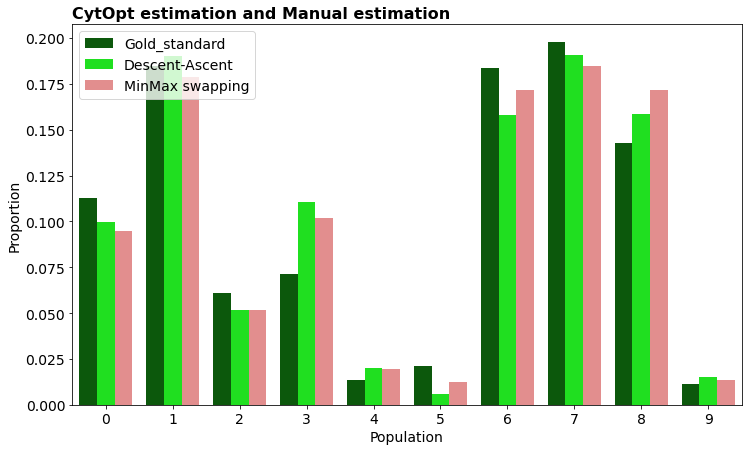

In [87]:
CytOpt_plot.bar_plot(h_hat1)